In [1028]:
#importing libraries
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [1029]:
#step 1: reading the source file
main_file = pd.read_csv('C:\\Users\\Nikita Maurya\\Downloads\\gapminder_clean.csv', encoding= 'unicode_escape')

In [1030]:
main_file.info() #exploring data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               2607 non-null   int64  
 1   Country Name                                             2607 non-null   object 
 2   Year                                                     2607 non-null   int64  
 3   Agriculture, value added (% of GDP)                      1428 non-null   float64
 4   CO2 emissions (metric tons per capita)                   2193 non-null   float64
 5   Domestic credit provided by financial sector (% of GDP)  1743 non-null   float64
 6   Electric power consumption (kWh per capita)              1369 non-null   float64
 7   Energy use (kg of oil equivalent per capita)             1410 non-null   float64
 8   Exports of goods and service

In [1031]:
pd.isnull(main_file).sum() #checking for null values in each column

Unnamed: 0                                                    0
Country Name                                                  0
Year                                                          0
Agriculture, value added (% of GDP)                        1179
CO2 emissions (metric tons per capita)                      414
Domestic credit provided by financial sector (% of GDP)     864
Electric power consumption (kWh per capita)                1238
Energy use (kg of oil equivalent per capita)               1197
Exports of goods and services (% of GDP)                    798
Fertility rate, total (births per woman)                    184
GDP growth (annual %)                                       691
Imports of goods and services (% of GDP)                    798
Industry, value added (% of GDP)                           1189
Inflation, GDP deflator (annual %)                          706
Life expectancy at birth, total (years)                     189
Population density (people per sq. km of

In [1032]:
main_file.drop(['Unnamed: 0'], axis=1, inplace=True) #dropping unwanted column
main_file.rename(columns={'CO2 emissions (metric tons per capita)': 'CO2_emissions_metric_tons_per_capita'}, inplace=True)
main_file.columns

Index(['Country Name', 'Year', 'Agriculture, value added (% of GDP)',
       'CO2_emissions_metric_tons_per_capita',
       'Domestic credit provided by financial sector (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'Fertility rate, total (births per woman)', 'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)',
       'Industry, value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Population density (people per sq. km of land area)',
       'Services, etc., value added (% of GDP)', 'pop', 'continent',
       'gdpPercap'],
      dtype='object')

In [1033]:
"""
Step 2: To make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap in the eyear 1962.
"""
file_1962 = main_file[main_file.Year == 1962]

In [1034]:
#checking and calculating the null values of the column gdpPercap
pd.isnull(file_1962.gdpPercap).sum()

131

In [1035]:
pd.isnull(file_1962.CO2_emissions_metric_tons_per_capita).sum()

64

In [1036]:
#Filtering the NaN values from column gdpPercap
filtered_file_1962 = file_1962[~pd.isnull(file_1962.gdpPercap) & ~pd.isnull(file_1962.CO2_emissions_metric_tons_per_capita)]

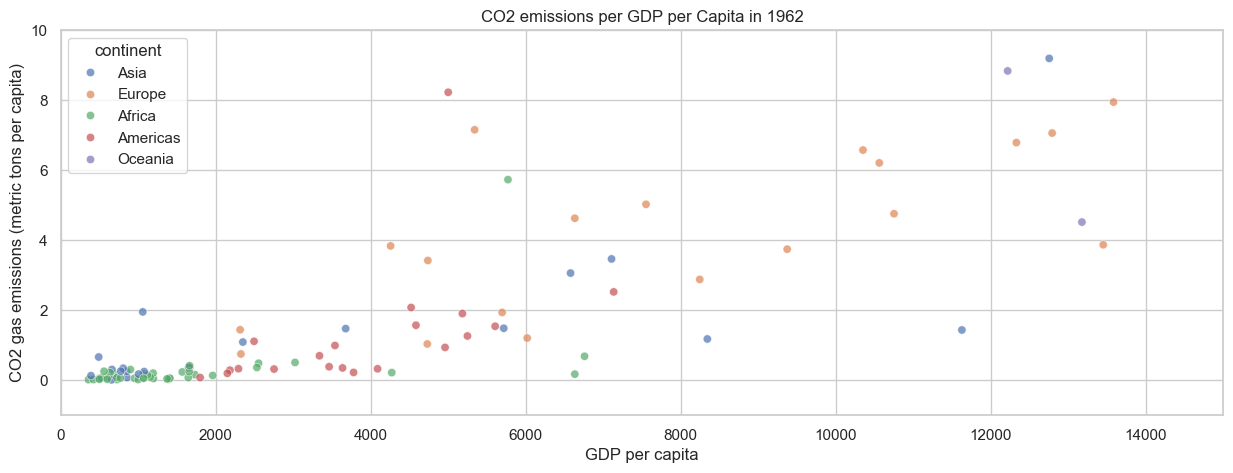

'\nAccording to the below graph, it is evident that nations that have higher GDP per capita emitted higher levels of CO2.\nAfrican countries, in particular, generate the lowest CO2 gas emissions and have the smallest GDP per capita. \nConversely, European and American nations are the leading producers of CO2 gas emissions and have the largest GDP per capita.\n'

In [1037]:
sns.set(rc={'figure.figsize': (15, 5)}) #rc stands for runtime configuration 
sns.set(style="whitegrid") #for white background
a = sns.scatterplot(x='gdpPercap', y='CO2_emissions_metric_tons_per_capita', data=filtered_file_1962,
                    hue='continent', alpha=0.7)
a.set(xlabel="GDP per capita", ylabel="CO2 gas emissions (metric tons per capita)")
plt.xlim(-1, 15000)  #setting limit on x axis
plt.ylim(-1, 10)  
plt.title('CO2 emissions per GDP per Capita in 1962')
plt.show()

"""
According to the below graph, it is evident that nations that have higher GDP per capita emitted higher levels of CO2.
African countries, in particular, generate the lowest CO2 gas emissions and have the smallest GDP per capita. 
Conversely, European and American nations are the leading producers of CO2 gas emissions and have the largest GDP per capita.
"""

In [1038]:
list_of_correlation = {} #created dictionary to append the correlation values in different years

In [1039]:
"""
Step3: On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. 
What is the correlation and associated p value?

here
scipy is used for scientific computing. 
stats is a submodule within Scipy that provides statistical functions.
pearsonr function within the stats module is used for calculating the correlation coefficient 
and the associated p-value between two variables (GDP and CO@ gas emission).

The Pearson correlation coefficient is a measure of the linear relationship between two variables. It ranges from -1 to 1, 
where:

1  --> indicates a perfect positive linear relationship,
-1 --> indicates a perfect negative linear relationship,
0  --> indicates no linear relationship.

Null hypothesis: there is no correlation between GDP and CO2 gas emission.
Assumption: there is a correlation between GDP and CO2 gas emission.

If the p-value is below a certain significance level (commonly 0.05), 
it suggests that the observed correlation is unlikely to be due to random chance.

Since the p-value is very small, we reject the null hypothesis and accept the assumption
that GDP per Capita has a strong correlation with CO2 gas emissions.
"""
from scipy.stats import pearsonr 

correlation_1962, p_value = pearsonr(filtered_file_1962['gdpPercap'], filtered_file_1962['CO2_emissions_metric_tons_per_capita'])
print(f'1962: {correlation_1962}')
print(f'P-value of 1962: {p_value}')
list_of_correlation['correlation_1962'] = correlation_1962

1962: 0.9260816725019468
P-value of 1962: 1.1286792210040494e-46


In [1040]:
main_file.Year.unique() #there are total 8 different years.

array([1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007],
      dtype=int64)

In [1041]:
print(main_file.columns)

Index(['Country Name', 'Year', 'Agriculture, value added (% of GDP)',
       'CO2_emissions_metric_tons_per_capita',
       'Domestic credit provided by financial sector (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'Fertility rate, total (births per woman)', 'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)',
       'Industry, value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Population density (people per sq. km of land area)',
       'Services, etc., value added (% of GDP)', 'pop', 'continent',
       'gdpPercap'],
      dtype='object')


In [1042]:
main_file.dropna(subset=['gdpPercap', 'CO2_emissions_metric_tons_per_capita'], inplace=True)

ddd = []  #list of df for each year

for i in main_file.Year.unique(): 
    dfff = main_file[(main_file['Year'] == i)]
    ddd.append(dfff)

for i in range(len(ddd)):
    selected_columnss = ['gdpPercap', 'CO2_emissions_metric_tons_per_capita']
    new_dfff = ddd[i][selected_columnss]
    correlation, p_value = pearsonr(new_dfff['gdpPercap'], new_dfff['CO2_emissions_metric_tons_per_capita'])
    list_of_correlation[ddd[i]['Year'].iloc[0]] = correlation  # Corrected this line

print(list_of_correlation)

{'correlation_1962': 0.9260816725019468, 1962: 0.9260816725019468, 1967: 0.9387918385063311, 1972: 0.8428985866268466, 1977: 0.7928335935904501, 1982: 0.8166384024309292, 1987: 0.8095530841191892, 1992: 0.8094316203754854, 1997: 0.8081396359866696, 2002: 0.8006420656289517, 2007: 0.7204168835195922}


In [1043]:
#Step4: to determine which year had the strongest correlation
strongest_correlation_year = max(list_of_correlation, key=list_of_correlation.get) #to get max from dictionary m, where which key has max
#print(strongest_correlation_year)
strongest_correlation = list_of_correlation[strongest_correlation_year]
print(f'The strongest correlation was found in 1967 with value {strongest_correlation}')

The strongest correlation was found in 1967 with value 0.9387918385063311


In [1044]:
main_file.columns

Index(['Country Name', 'Year', 'Agriculture, value added (% of GDP)',
       'CO2_emissions_metric_tons_per_capita',
       'Domestic credit provided by financial sector (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'Fertility rate, total (births per woman)', 'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)',
       'Industry, value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Population density (people per sq. km of land area)',
       'Services, etc., value added (% of GDP)', 'pop', 'continent',
       'gdpPercap'],
      dtype='object')

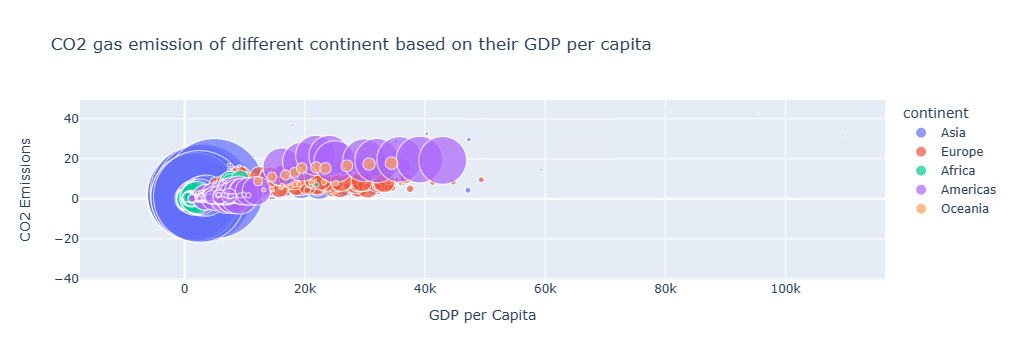

In [1045]:
"""
Step 5: Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap,
where the point size is determined by pop (population) and the color is determined by the continent.
"""

fig = px.scatter(main_file, x='gdpPercap', y='CO2_emissions_metric_tons_per_capita',
                 size='pop', color='continent', hover_name='Country Name',
                 title='CO2 gas emission of different continent based on their GDP per capita',
                 labels={'gdpPercap': 'GDP per Capita', 'CO2_emissions_metric_tons_per_capita': 'CO2 Emissions'},
                 size_max=100)
fig.show()

In [1046]:
main_file.shape

(1184, 19)

In [1047]:
main_file.dropna(subset=['continent','Energy use (kg of oil equivalent per capita)'], inplace=True)

In [1048]:
main_file.shape

(830, 19)

In [1049]:
main_file #continent and Energy use (kg of oil equivalent per capita)

,Country Name,Year,"Agriculture, value added (% of GDP)",CO2_emissions_metric_tons_per_capita,Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
12,Albania,1972,NaN,2.515914,NaN,568.403202,865.592481,NaN,4.642,NaN,NaN,NaN,NaN,67.585951,81.865912,NaN,2263554.0,Europe,3313.422188
13,Albania,1977,NaN,2.275876,NaN,1067.814156,923.728868,NaN,3.966,NaN,NaN,NaN,NaN,69.456171,91.735255,NaN,2509048.0,Europe,3533.003910
14,Albania,1982,31.699710,2.624857,NaN,1096.873229,966.683284,19.375001,3.452,2.948597,23.877538,43.800170,-0.017694,70.685122,101.615985,24.500119,2780097.0,Europe,3630.880722
15,Albania,1987,33.200025,2.414061,NaN,1161.951677,921.893044,15.466297,3.164,-0.787843,15.562511,45.800152,0.000029,71.861951,112.540328,20.999824,3075321.0,Europe,3738.932735
16,Albania,1992,51.641870,0.774725,NaN,442.249077,418.286630,11.490438,2.829,-7.200000,88.512248,23.320559,249.683437,71.900805,118.505073,25.037571,3326498.0,Europe,2497.437901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,Zimbabwe,1987,14.407528,1.598217,74.161607,878.072691,896.673611,24.015710,5.784,1.150737,21.274886,32.451242,7.189361,61.753805,24.649495,53.141236,9216418.0,Africa,706.157306
2603,Zimbabwe,1992,7.413793,1.533724,43.120518,778.695133,923.493407,27.227263,4.840,-9.015570,36.485231,40.862069,-14.129659,56.491976,28.485762,51.724135,10704340.0,Africa,693.420786
2604,Zimbabwe,1997,18.934082,1.194678,63.058320,870.988697,804.508892,37.595273,4.237,2.680594,44.609791,25.554678,-2.879048,46.065902,31.174507,55.511236,11404948.0,Africa,792.449960
2605,Zimbabwe,2002,14.029007,0.942795,164.559047,827.329873,772.676619,31.834799,4.018,-8.894023,34.972553,NaN,2.712950,40.679146,32.807111,NaN,11926563.0,Africa,672.038623


In [1050]:
"""
Step 6. What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? 
Why Anova?
I chose the ANOVA test over the t-test because there are more than two independent groups/continents to compare. 
One way ANOVA was used because data is independent of each other, 
to find whether there exists any significant correlation between continent and their energy use   
Since the p-value is very low (below 0.05), we reject the assumption and accept the null hypothesis
that the continent and their energy use are not strongly correlated.
"""
from scipy.stats import f_oneway
grouped_data = [] #a list to store the 'Energy use' of each continent


for continent in main_file['continent'].unique():
    #Need only the energy value of the current
    continent_data = main_file['Energy use (kg of oil equivalent per capita)'][main_file['continent'] == continent]
    
    #Append'Energy use' values to the list
    grouped_data.append(continent_data)
# Perform ANOVA test
f_statistic, p_value = f_oneway(*grouped_data)

print(f'P-value: {p_value}')

if p_value < 0.05:
    print("the continent and their energy use are not correlated")
else:
    print("The continent and their energy use are strongly correlated")

P-value: 3.987577302591487e-36
the continent and their energy use are not correlated


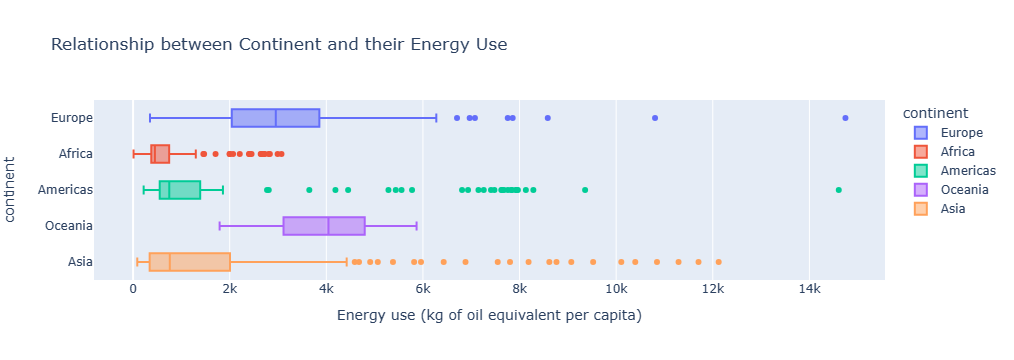

"\nWhat is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? \nSince there were many countries within each continent, I used a box plot to demonstrate comparison. \nAfrica consumes the lowest energy use, followed by America and Asia. Europe consumes the highest amount of energy use.\n"

In [1051]:
#Demonstrating Step 6 with box plot

fig = px.box(main_file, 
             y='continent', x='Energy use (kg of oil equivalent per capita)',
             color='continent',
             title='Relationship between Continent and their Energy Use')
fig.show()

"""
What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? 
Since there were many countries within each continent, I used a box plot to demonstrate comparison. 
Africa consumes the lowest energy use, followed by America and Asia. Europe consumes the highest amount of energy use.
"""

In [1052]:
"""
Step 7: Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990?
(Stats test needed)

Null hypothesis: here is no significant difference between the groups
Assumption: here is a significant difference between the groups
"""

from scipy.stats import ttest_ind

Asia_before = main_file[(main_file['continent'] == 'Asia') & (main_file['Year'] < 1990)]
Asia_after = main_file[(main_file['continent'] == 'Asia') & (main_file['Year'] > 1990)]
Europe_before = main_file[(main_file['continent'] == 'Europe') & (main_file['Year'] < 1990)]
Europe_after = main_file[(main_file['continent'] == 'Europe') & (main_file['Year'] > 1990)]

t_statistic, p_value = ttest_ind(Asia_after['Imports of goods and services (% of GDP)'].dropna(),Europe_after['Imports of goods and services (% of GDP)'].dropna())

print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('There is no significant difference between and Asia.')
else:
    print('There is a significant difference between Europe and Asia.')

P-value: 0.2936253729486661
There is a significant difference between Europe and Asia.


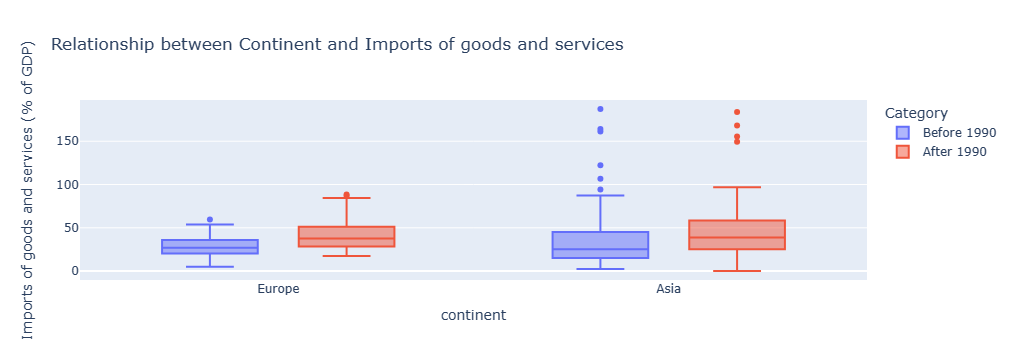

'\nConclusion: There was a significant growth in the imports of goods and services after 1990 in Europe, \nAsian countries experienced a minor upturn during the same period. \nIn both periods, Asia was leading Europe in terms of the imports of goods and services.\n'

In [1053]:

#here bins are intervals, we are adding a new column called Category where the main file will have rows filled with after and before 1990 

main_file['Category'] = pd.cut(main_file['Year'], bins=[1962, 1990, 2007], labels=['Before 1990', 'After 1990'])

# Filter data for Asia and Europe
filtered_data = main_file[(main_file['continent'].isin(['Asia', 'Europe']))]

# Plot box plot
fig = px.box(filtered_data, x='continent', y='Imports of goods and services (% of GDP)',
             color='Category',
             title='Relationship between Continent and Imports of goods and services')
fig.show()

"""
Conclusion: There was a significant growth in the imports of goods and services after 1990 in Europe, 
Asian countries experienced a minor upturn during the same period. 
In both periods, Asia was leading Europe in terms of the imports of goods and services.
"""

In [1054]:
main_file = pd.read_csv('C:\\Users\\Nikita Maurya\\Downloads\\gapminder_clean.csv', encoding= 'unicode_escape')
main_file.shape

(2607, 20)

In [1055]:
main_file.isnull().sum()

Unnamed: 0                                                    0
Country Name                                                  0
Year                                                          0
Agriculture, value added (% of GDP)                        1179
CO2 emissions (metric tons per capita)                      414
Domestic credit provided by financial sector (% of GDP)     864
Electric power consumption (kWh per capita)                1238
Energy use (kg of oil equivalent per capita)               1197
Exports of goods and services (% of GDP)                    798
Fertility rate, total (births per woman)                    184
GDP growth (annual %)                                       691
Imports of goods and services (% of GDP)                    798
Industry, value added (% of GDP)                           1189
Inflation, GDP deflator (annual %)                          706
Life expectancy at birth, total (years)                     189
Population density (people per sq. km of

In [1056]:
main_file.dropna(subset=["Population density (people per sq. km of land area)",'Life expectancy at birth, total (years)'],inplace=True)
main_file

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,2602,Zimbabwe,1987,14.407528,1.598217,74.161607,878.072691,896.673611,24.015710,5.784,1.150737,21.274886,32.451242,7.189361,61.753805,24.649495,53.141236,9216418.0,Africa,706.157306
2603,2603,Zimbabwe,1992,7.413793,1.533724,43.120518,778.695133,923.493407,27.227263,4.840,-9.015570,36.485231,40.862069,-14.129659,56.491976,28.485762,51.724135,10704340.0,Africa,693.420786
2604,2604,Zimbabwe,1997,18.934082,1.194678,63.058320,870.988697,804.508892,37.595273,4.237,2.680594,44.609791,25.554678,-2.879048,46.065902,31.174507,55.511236,11404948.0,Africa,792.449960
2605,2605,Zimbabwe,2002,14.029007,0.942795,164.559047,827.329873,772.676619,31.834799,4.018,-8.894023,34.972553,NaN,2.712950,40.679146,32.807111,NaN,11926563.0,Africa,672.038623


In [1057]:
d = [] #contains dataframes, countries and pop for each year
new_d = []
for i in main_file.Year.unique(): #each year in the list of unique years
    df= main_file[(main_file['Year'] == i)] #create dfs for each unique years
    d.append(df) #add it to the df list
for i in range(len(d)): #retrieve each df from the list
    selected_columns = ['Country Name','Year', 'Population density (people per sq. km of land area)']
    new_df = d[i][selected_columns] #retrieving only the above mentioned columns from the dataframes in the list of dataframes
    new_d.append(new_df.sort_values(by='Population density (people per sq. km of land area)',ascending=False).head()) #sorting them

print(pd.concat(new_d))
"""
Q.8 What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years?
(i.e., which country has the highest average ranking in this category across each time point in the dataset?)

Moncao, Macao SAR, Hong Kong, Singapore, Gibraltar had the highest 'Population density (people per sq. km of land area)' across all years.
"""

              Country Name  Year  \
1440      Macao SAR, China  1962   
1000  Hong Kong SAR, China  1962   
2070             Singapore  1962   
1510                 Malta  1962   
420        Channel Islands  1962   
1441      Macao SAR, China  1967   
1001  Hong Kong SAR, China  1967   
2071             Singapore  1967   
1511                 Malta  1967   
421        Channel Islands  1967   
1442      Macao SAR, China  1972   
1002  Hong Kong SAR, China  1972   
2072             Singapore  1972   
1512                 Malta  1972   
422        Channel Islands  1972   
1443      Macao SAR, China  1977   
1003  Hong Kong SAR, China  1977   
2073             Singapore  1977   
1513                 Malta  1977   
423        Channel Islands  1977   
1444      Macao SAR, China  1982   
1004  Hong Kong SAR, China  1982   
2074             Singapore  1982   
1514                 Malta  1982   
424        Channel Islands  1982   
1445      Macao SAR, China  1987   
1005  Hong Kong SAR, China  

"\nQ.8 What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years?\n(i.e., which country has the highest average ranking in this category across each time point in the dataset?)\n\nMoncao, Macao SAR, Hong Kong, Singapore, Gibraltar had the highest 'Population density (people per sq. km of land area)' across all years.\n"

In [1058]:
result_df = pd.concat([new_d[0],new_d[1],new_d[2],new_d[3],new_d[4],new_d[5],new_d[6],new_d[7],new_d[8],new_d[9]])
result_df

,Country Name,Year,Population density (people per sq. km of land area)
1440,"Macao SAR, China",1962,9051.250000
1000,"Hong Kong SAR, China",1962,3240.392157
2070,Singapore,1962,2612.238806
1510,Malta,1962,1012.187500
420,Channel Islands,1962,586.647368
1441,"Macao SAR, China",1967,11362.900000
1001,"Hong Kong SAR, China",1967,3649.803922
2071,Singapore,1967,2951.641791
1511,Malta,1967,973.593750
421,Channel Islands,1967,618.289474


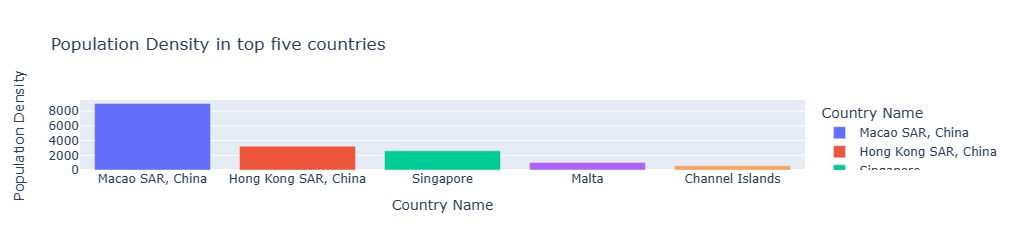

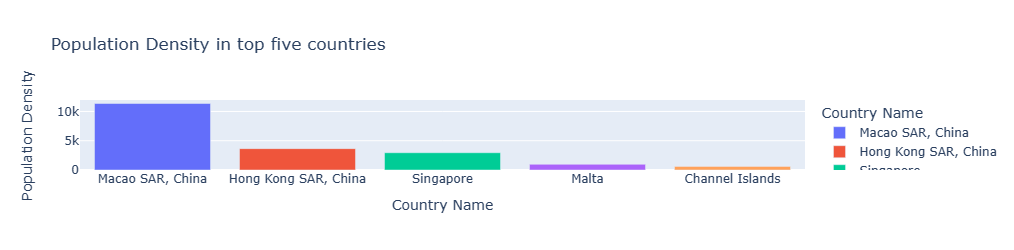

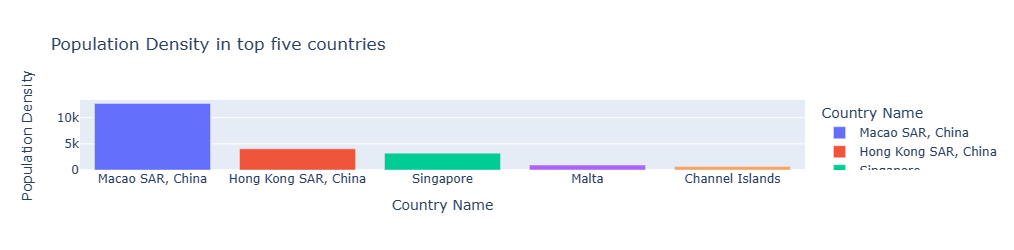

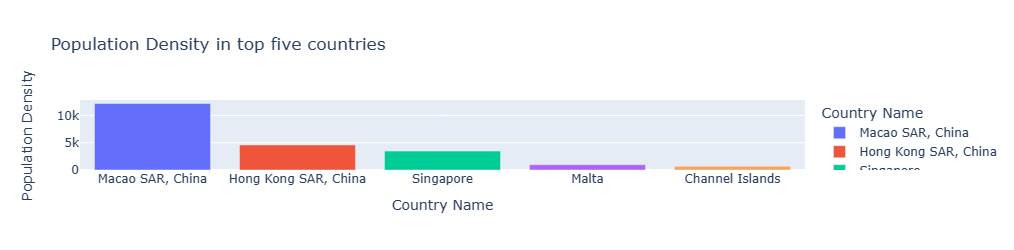

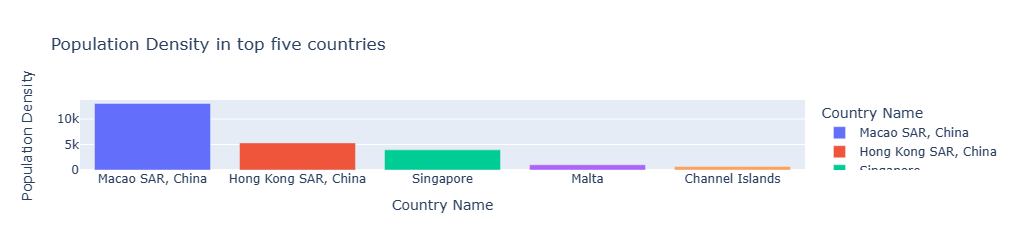

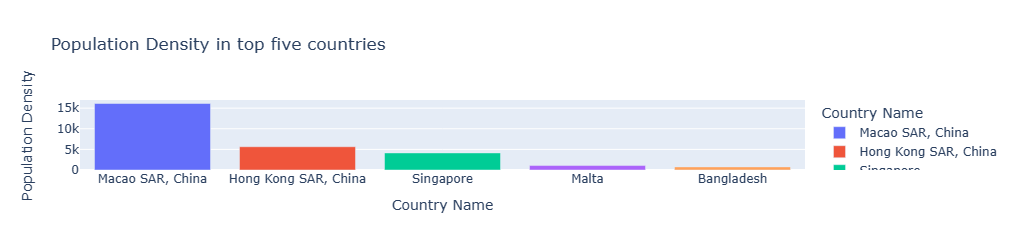

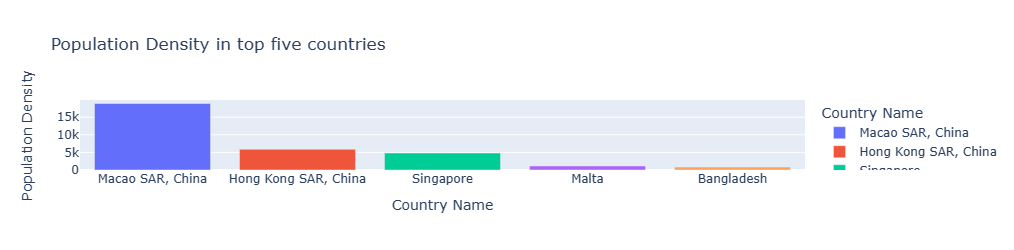

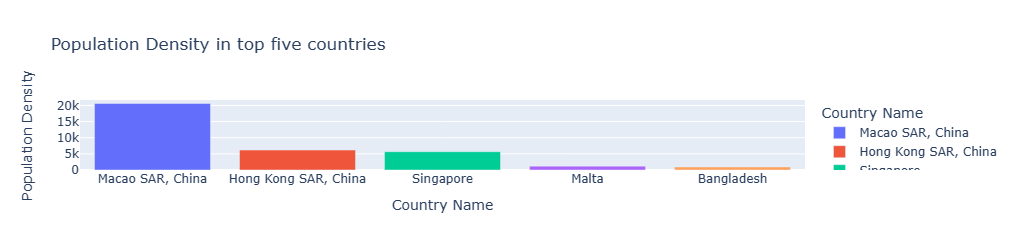

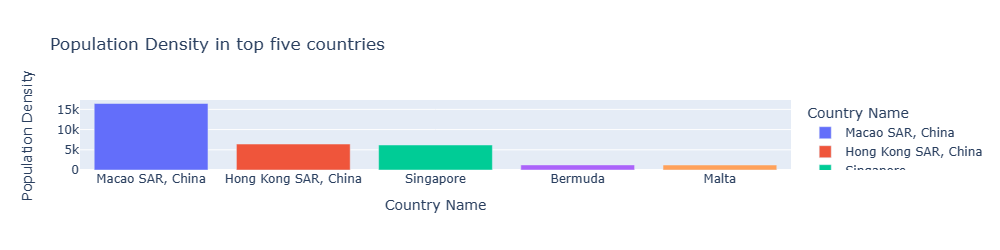

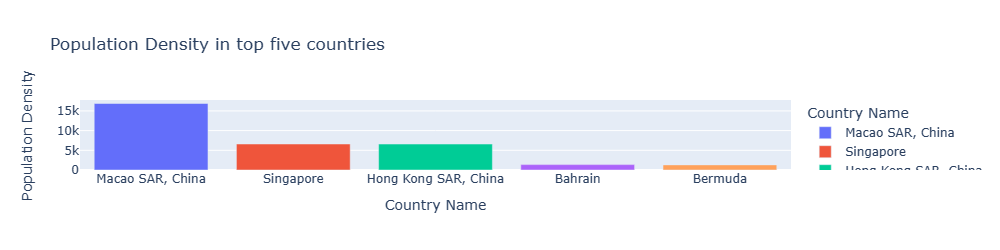

In [1059]:

for i in range(len(new_d)):
    fig = px.bar(new_d[i],x='Country Name',y='Population density (people per sq. km of land area)', hover_name='Year', color='Country Name',
                labels={'Country Name':'Country Name', 'Population density (people per sq. km of land area)':'Population Density'},
                title='Population Density in top five countries')
    fig.update_layout(height=250)
    fig.show()

In [1060]:
dd = [] #contains dataframes, countries and life expectancy for each year
new_dd = []
for i in main_file.Year.unique(): #each year in the list of unique years
    df= main_file[(main_file['Year'] == i)] #create dfs for each unique years
    dd.append(df) #add it to the df list
for i in range(len(dd)): #retrieve each df from the list
    selected_columns = ['Country Name','Year', 'Life expectancy at birth, total (years)']
    new_df = dd[i][selected_columns] #retrieving only the above mentioned columns from the dataframes in the list of dataframes
    new_dd.append(new_df.sort_values(by='Life expectancy at birth, total (years)',ascending=False).head()) #sorting them
resulted_dff = pd.concat(new_dd)
print(resulted_dff)

              Country Name  Year  Life expectancy at birth, total (years)
1070               Iceland  1962                                73.721951
1780                Norway  1962                                73.448049
2293                Sweden  1962                                73.350488
1706           Netherlands  1962                                73.323902
560                Denmark  1962                                72.319756
2294                Sweden  1967                                74.122439
1781                Norway  1967                                74.066585
1707           Netherlands  1967                                73.804146
1071               Iceland  1967                                73.783171
561                Denmark  1967                                72.922195
2295                Sweden  1972                                74.718049
1072               Iceland  1972                                74.455854
1782                Norway  1972      

In [1061]:
resulted_dff.shape

(50, 3)

In [1062]:
resulted_dff.columns

Index(['Country Name', 'Year', 'Life expectancy at birth, total (years)'], dtype='object')

In [1063]:
resulted_dff.rename(columns = {'Country Name':'Country_Name'}, inplace=True)

In [1064]:
list_of_countries = resulted_dff.Country_Name.unique()

In [1065]:
for i in range(len(list_of_countries)):
    d1 = resulted_dff[(resulted_df['Country Name'] == list_of_countries[i])]
    print(d1)

     Country_Name  Year  Life expectancy at birth, total (years)
1070      Iceland  1962                                73.721951
1071      Iceland  1967                                73.783171
1072      Iceland  1972                                74.455854
1073      Iceland  1977                                76.373659
1074      Iceland  1982                                77.037805
1075      Iceland  1987                                77.339024
1076      Iceland  1992                                78.760244
1078      Iceland  2002                                80.502439
1079      Iceland  2007                                81.453659
     Country_Name  Year  Life expectancy at birth, total (years)
1780       Norway  1962                                73.448049
1781       Norway  1967                                74.066585
1782       Norway  1972                                74.344634
1783       Norway  1977                                75.386829
     Country_Name  Year  

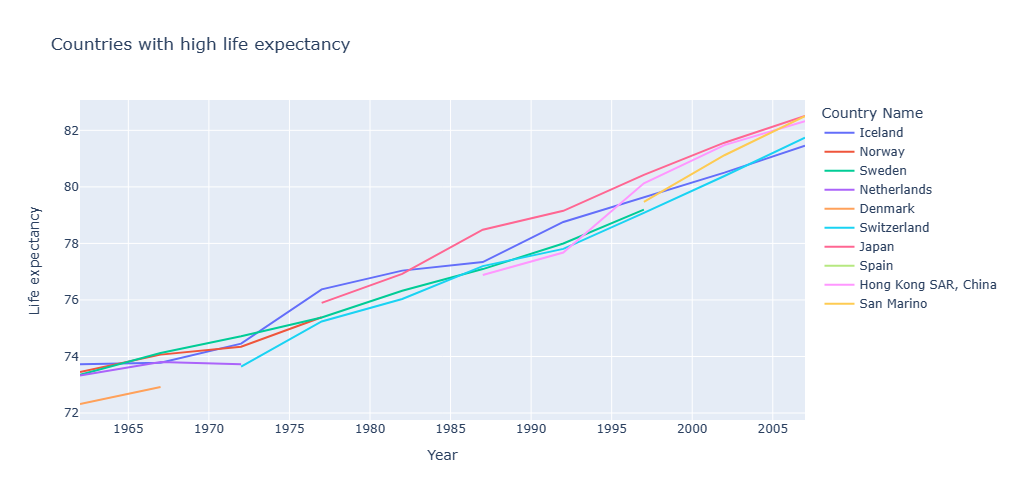

"\nWhat country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?\nanswer: Iceland\n"

In [1066]:
import plotly.express as px

fig = px.line(resulted_dff,x='Year',y='Life expectancy at birth, total (years)', hover_name='Country_Name', color='Country_Name',
                labels={'Country_Name':'Country Name', 'Life expectancy at birth, total (years)':'Life expectancy'},
                title='Countries with high life expectancy')
fig.update_layout(height=500)
fig.show()

"""
What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?
answer: Iceland
"""